<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Tarea Semanal Nº1
#### Tobías Guerrero

## 1. Introducción

En este primer trabajo se pide diseñar un generador de señales a utilizar en las primeras simulaciones. Consistirá en programar una función que genere señales senoidales y que permita parametrizar:

- la amplitud máxima de la senoidal (volts)
- su valor medio (volts)
- la frecuencia (Hz)
- la fase (radianes)
- la cantidad de muestras digitalizada por el ADC (# muestras)
- la frecuencia de muestreo del ADC.

La función debe admitir ser llamada de la siguiente manera:

$tt, xx = mifuncion( vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)$

Además, se agregará la posibilidad de generar señales cuadrada, diente de sierra o triangular. En este sentido, se agregará un parámetro a la función que indique el tipo de señal a generar.

## 2. Definición de la función

In [1]:
# Librerías a utilizar para la función
import numpy as np

def mifuncion( modo = "seno" , vmax = 1 , dc = 0 , ff = 1 , ph = 0 , nn = 1000 , fs = 1000 ):
    x = np.linspace(0 , nn/fs , nn) # Genero el array de tiempo
    if modo == "seno":
        y = dc + vmax * np.sin(2*np.pi*ff*x + ph) # Para generar la función senoidal utilizo la función provista por numpy
    elif modo == "cuadrada":
        y = dc + vmax * np.sign(np.sin(2*np.pi*ff*x + ph)) # Para generar una función cuadrada tomo el signo de la función seno
    elif modo == "diente":
        y = dc + 2 * vmax * (x * ff%1) - vmax # Para generar una función diente de sierra utilizo la fórmula de la recta que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    elif modo == "triangular":
        y = dc + 2 * vmax * (1 - np.abs((x * ff%1) - 0.5) * 2) - vmax ## Para generar una función triangular utilizo la fórmula que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    return x,y

## 3. Función Seno

(-1.1, 1.1)

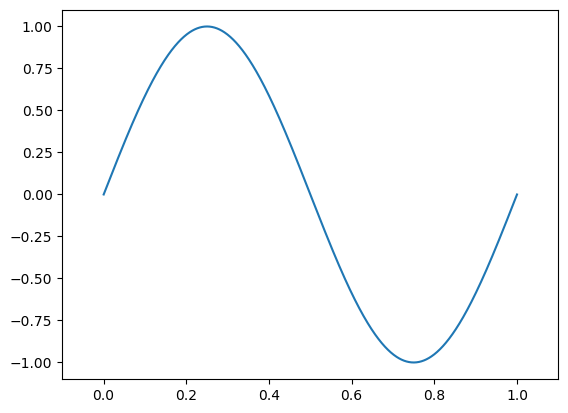

In [2]:
# Librerías a utilizar para graficar
import matplotlib.pyplot as plt

modo = "seno"
vmax = 1
dc = 0
frec = 1
fase = 0 # En radianes
muestras = 1000
fs = 1000

x , y = mifuncion( modo , vmax , dc , frec , fase , muestras , fs )

# Gráficos
plt.plot(x,y)
plt.xlim(-0.1,1.1)
plt.ylim(-(vmax*1.1+dc),vmax*1.1+dc)

(-0.10000000000000009, 2.1)

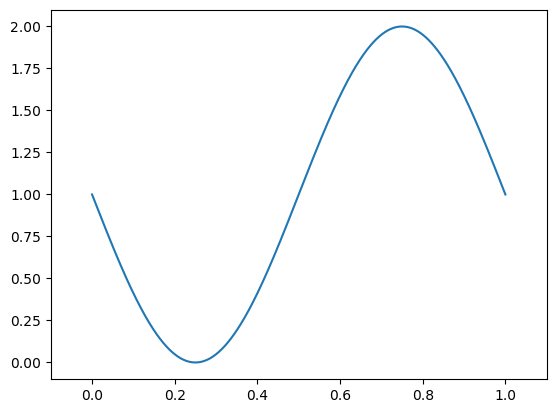

In [3]:
# Puedo modificar el valor medio y la fase inicial de la función

dc = 1
fase = np.pi

x , y = mifuncion( modo , vmax , dc , frec , fase , muestras , fs )

# Gráficos
plt.plot(x,y)
plt.xlim(-0.1,1.1)
plt.ylim(-(vmax*1.1)+dc,vmax*1.1+dc)

## 4. Función Cuadrada

(-1.1, 1.1)

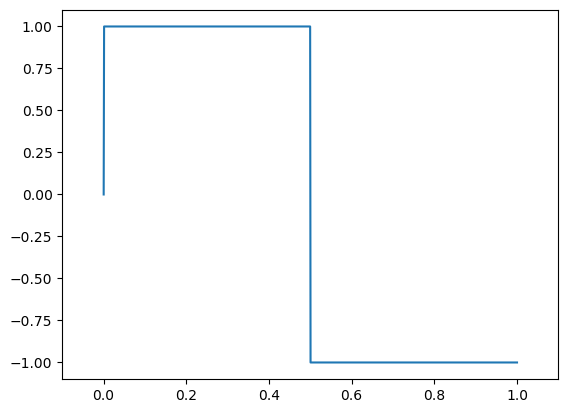

In [4]:
#Únicamente es necesario cambiar la variable modo

modo = "cuadrada"

# Devuelvo el valor medio y la fase inicial a sus valores originales
dc = 0
fase = 0

x , y = mifuncion( modo , vmax , dc , frec , fase , muestras , fs )

# Gráficos
plt.plot(x,y)
plt.xlim(-0.1,1.1)
plt.ylim(-(vmax*1.1)+dc,vmax*1.1+dc)

(-1.1, 1.1)

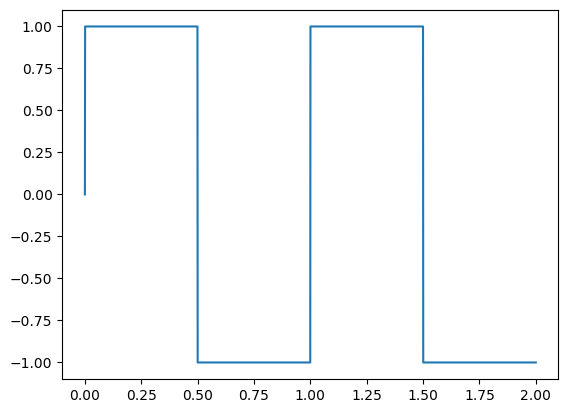

In [5]:
# Si quisiera graficar más ciclos, aumento el número de muestras

muestras = 2000

x , y = mifuncion( modo , vmax , dc , frec , fase , muestras , fs )

# Gráficos
plt.plot(x,y)
plt.xlim(-0.1,2.1)
plt.ylim(-(vmax*1.1)+dc,vmax*1.1+dc)

## 5. Función Diente de Sierra

(-1.1, 1.1)

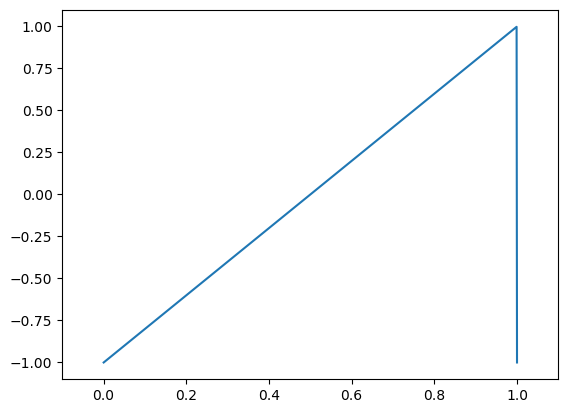

In [6]:
modo = "diente"
muestras = 1000

x , y = mifuncion( modo , vmax , dc , frec , fase , muestras , fs )

# Gráficos
plt.plot(x,y)
plt.xlim(-0.1,1.1)
plt.ylim(-(vmax*1.1)+dc,vmax*1.1+dc)

(-1.1, 1.1)

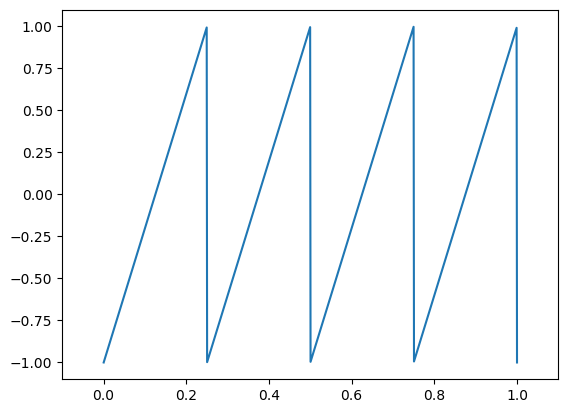

In [7]:
# Podría graficar una señal con mayor frecuencia

frec = 4

x , y = mifuncion( modo , vmax , dc , frec , fase , muestras , fs )

# Gráficos
plt.plot(x,y)
plt.xlim(-0.1,1.1)
plt.ylim(-(vmax*1.1)+dc,vmax*1.1+dc)

## 6. Función Triangular

(-1.1, 1.1)

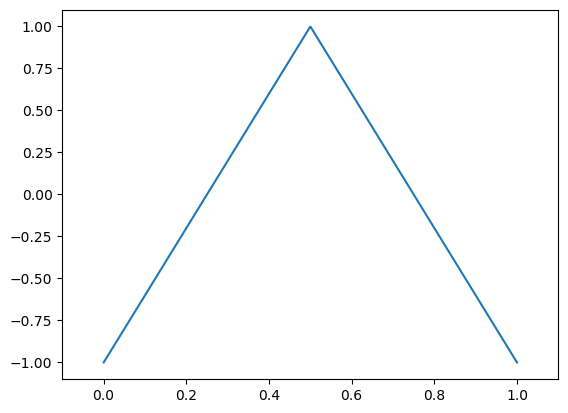

In [8]:
modo = "triangular"
frec = 1

x , y = mifuncion( modo , vmax , dc , frec , fase , muestras , fs )

# Gráficos
plt.plot(x,y)
plt.xlim(-0.1,1.1)
plt.ylim(-(vmax*1.1)+dc,vmax*1.1+dc)

(-1.1, 1.1)

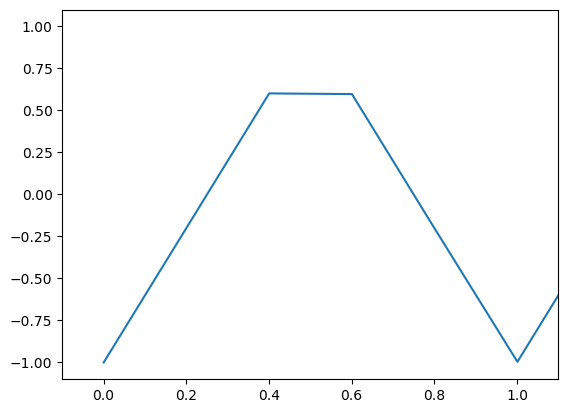

In [9]:
# Podemos observar la deformación que sufre la señal al bajar la frecuencia de muestreo

fs = 5

x , y = mifuncion( modo , vmax , dc , frec , fase , muestras , fs )

# Gráficos
plt.plot(x,y)
plt.xlim(-0.1,1.1)
plt.ylim(-(vmax*1.1)+dc,vmax*1.1+dc)

## 7. Conclusiones

Gracias al lenguaje de programación Python y la librería numpy se cuenta con herramientas muy útiles a la hora de generar señales de forma sencilla y parametrizable. En este trabajo, se pudo programar correctamente un generador de señales que permite obtener funciones de 4 tipos distintos con parámetros controlables.